In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:

def detect_data_types(df):
    """
    Detect whether the data type for each column in the DataFrame is discrete, continuous, or unknown.

    Parameters:
        df (pd.DataFrame): DataFrame containing the columns to analyze.

    Returns:
        dict: A dictionary where keys are column names and values are the data types ('discrete', 'continuous', 'unknown').
    """
    discrete_text_container=[]
    discrete_numeric_container=[]
    continuous_container=[]
    unknown_container=[]
    
    

    for column in df.columns:
        # Drop NaN values for analysis
        col_data = df[column].dropna()
        
        # Get unique value counts
        unique_values = col_data.nunique()

        # Check if the column is numerical (int or float)
        if col_data.dtype in ['int64', 'float64']:
            # For integer-based data with few unique values, it's likely discrete
            if col_data.dtype == 'int64' and unique_values / len(col_data) < 0.05:
                discrete_numeric_container.append(column)
            else:
                continuous_container.append(column)
                
        
        # Check if the column is categorical/text data
        elif col_data.dtype == 'object' or col_data.dtype.name == 'category':
            discrete_text_container.append(column)
        
        # If there are very few unique values compared to the length, treat it as discrete
        elif unique_values / len(col_data) < 0.05:
            discrete_text_container.append(column)
        
        # If the data doesn't fit into any category, mark it as 'unknown'
        else:
            unknown_container.append(column)
    
    return [discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
            



def dataset_analysis(df,target_column=None):


    # Total rows
    total_rows = len(df)
    # Count of unique rows
    unique_rows = len(df.drop_duplicates())
    # Count of duplicate rows
    duplicate_rows = total_rows - unique_rows
    # Calculate percentages
    unique_percentage = (unique_rows / total_rows) * 100
    duplicate_percentage = (duplicate_rows / total_rows) * 100

    print('='*50)
    print('Dataset Shape (Rows & Columns)')
    print('='*50)
    print('Rows :-',df.shape[0])
    print('Columns :-',df.shape[1])
    print(f"Unique Rows: {unique_rows} ({unique_percentage:.2f}%)")
    print(f"Duplicate Rows: {duplicate_rows} ({duplicate_percentage:.2f}%)")


    # Check for null (missing) values and their counts
    print("\n" + "="*50)
    print("Columns with Null Values and Null Value Counts")
    print("="*50)
    null_columns = df.columns[df.isnull().any()]
    if null_columns.empty:
        print("No columns contain null values.")
    else:
        for col in null_columns:
            null_count = df[col].isnull().sum()
            print(f"{col}: {null_count} null values")


    # Data type-wise column count
    print("\n" + "="*50)
    print("Data Type Wise Column Count")
    print("="*50)
    dtype_count = df.dtypes.value_counts()
    print(dtype_count)
    


    # Discrete And Continous Data Analysis
    print("\n" + "="*50)
    print("Discrete And Continous Data Analysis")
    print("="*50)
    dtype_count = df.columns
    dectectDataTypeObj=detect_data_types(df)

     # Extract containers
    discrete_text_columns, discrete_numeric_columns, continuous_columns, unknown_columns = dectectDataTypeObj

    #[discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
    
    if(len(dectectDataTypeObj)>0):

        #Discrete Text Columns
        if len(dectectDataTypeObj[0])>0:
            print('Discrete Text Columns :',', '.join(discrete_text_columns))
        else:
            print('Discrete Text Columns :','-----')

        print('\n')

        #Discrete Numeric Columns
        if len(dectectDataTypeObj[1])>0:
            print('Discrete Numeric Columns :',', '.join(discrete_numeric_columns) )
        else:
            print('Discrete Numeric Columns :','-----')
        print('\n')

        #Continuous  Columns
        if len(dectectDataTypeObj[2])>0:
            print('Continuous Columns :',', '.join(continuous_columns))
        else:
            print('Continuous Columns :','-----')

        print('\n')
        
        #Unknown Columns
        if len(dectectDataTypeObj[3])>0:
            print('Unknown Columns :',', '.join(unknown_columns))
        else:
            print('Unknown Columns :','-----')

        

    if len(continuous_columns) > 0:
        

        # Check skewness in numerical columns
        print("\n" + "="*50)
        print("Skewness of Numerical Columns")
        print("="*50)
        skewness = df[continuous_columns].skew()
        
        if skewness.empty:
            print("No numerical columns to check skewness.")
        else:
            for col in skewness.index:
                skew_value = skewness[col]
                
                # Determine the skewness range and flag
                if skew_value > 1:
                    skew_range = "Strong Positive Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value >= 0.5:
                    skew_range = "Mild Positive Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                elif skew_value >= -0.5 and skew_value <= 0.5:
                    skew_range = "Approximately Symmetric"
                    #flag = "No transformation needed"
                    flag=""
                elif skew_value <= -1:
                    skew_range = "Strong Negative Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value <= -0.5:
                    skew_range = "Mild Negative Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                
                print(f"{col}: {skew_value:.2f} -> {skew_range}. {flag}")

        
        
        
            
    else:
        print("No numeric columns available for Skewness Analysis.")


    # Additional information aboutConstant unique values and example entries
    print("\n" + "="*50)
    print("Constant Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) == 1:
                print(f"{col}: {sorted(df[col].unique())}\n")
    

    # Additional information about unique values and example entries
    print("\n" + "="*50)
    print("Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) != 1:
                print(f"{col}: {sorted(df[col].unique())}\n")
    
    

    # Check for Imbalance in Custom Target Column
    if target_column:
        print(f"\n{'='*50}\nImbalance Analysis for '{target_column}'\n{'='*50}")
        target_counts = df[target_column].value_counts()
        target_percentage = target_counts / len(df) * 100
    
    
        # Check for Imbalance
        imbalance_ratio = target_counts.min() / target_counts.max()
        print(f"The dataset is {'imbalanced' if imbalance_ratio < 0.25 else 'balanced'} with respect to '{target_column}'.")

     
    

In [3]:
df=pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df=df.drop(columns='Id',axis=1)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
dataset_analysis(df,target_column='quality')

Dataset Shape (Rows & Columns)
Rows :- 1143
Columns :- 12
Unique Rows: 1018 (89.06%)
Duplicate Rows: 125 (10.94%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
float64    11
int64       1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : -----


Discrete Numeric Columns : quality


Continuous Columns : fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol


Unknown Columns : -----

Skewness of Numerical Columns
fixed acidity: 1.04 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
volatile acidity: 0.68 -> Mild Positive Skew. 
citric acid: 0.37 -> Approximately Symmetric. 
residual sugar: 4.36 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
chlorides: 6.03 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
free sulfur

<h3>Data Preprocessing & EDA</h3>

In [7]:
df.shape

(1143, 12)

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(1018, 12)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1018 non-null   float64
 1   volatile acidity      1018 non-null   float64
 2   citric acid           1018 non-null   float64
 3   residual sugar        1018 non-null   float64
 4   chlorides             1018 non-null   float64
 5   free sulfur dioxide   1018 non-null   float64
 6   total sulfur dioxide  1018 non-null   float64
 7   density               1018 non-null   float64
 8   pH                    1018 non-null   float64
 9   sulphates             1018 non-null   float64
 10  alcohol               1018 non-null   float64
 11  quality               1018 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 103.4 KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Replace spaces with underscores in those column names
df.rename(columns={col: col.replace(' ', '_') for col in numeric_cols}, inplace=True)

In [14]:
df.select_dtypes(include=['float64','int64']).columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

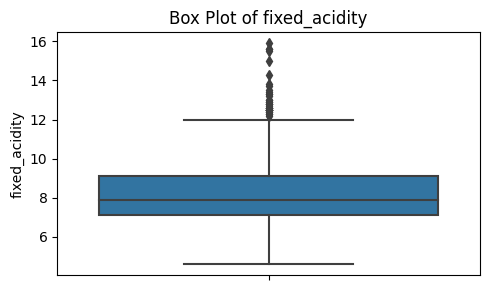

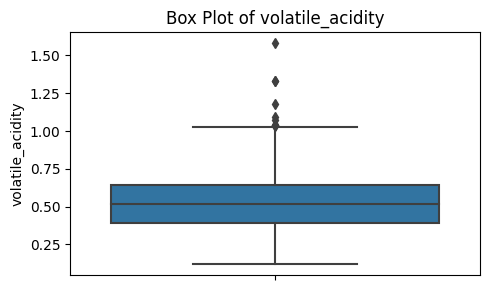

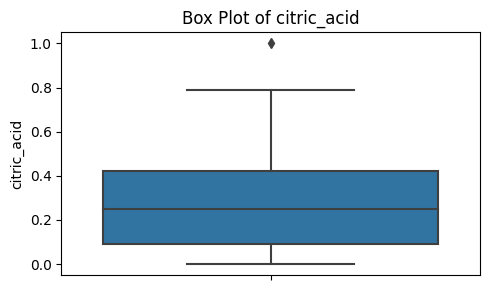

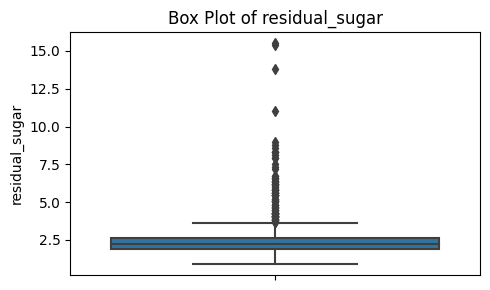

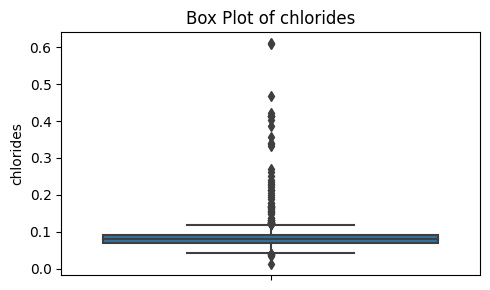

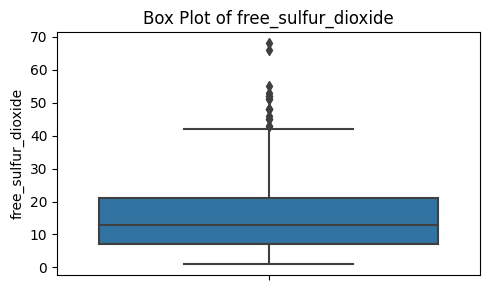

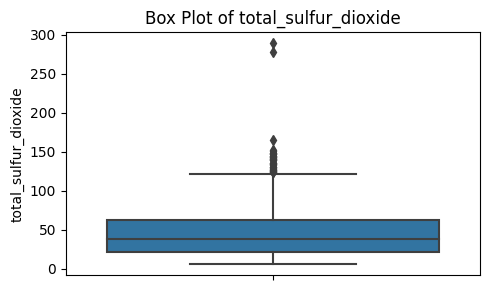

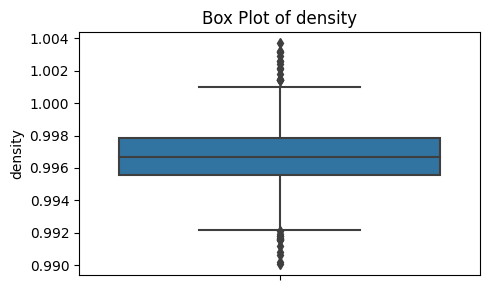

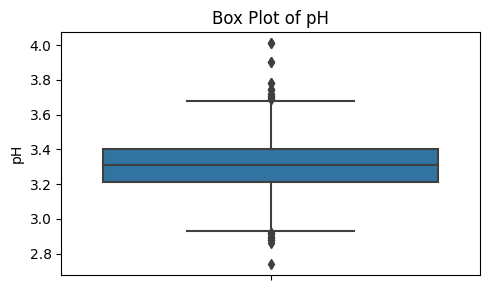

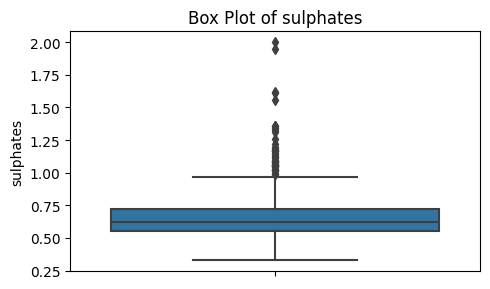

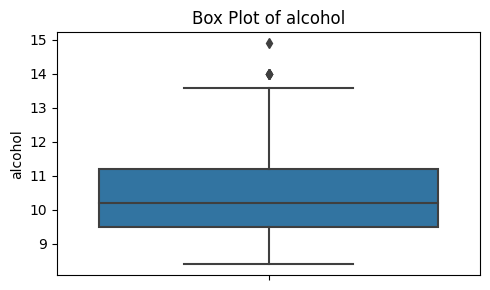

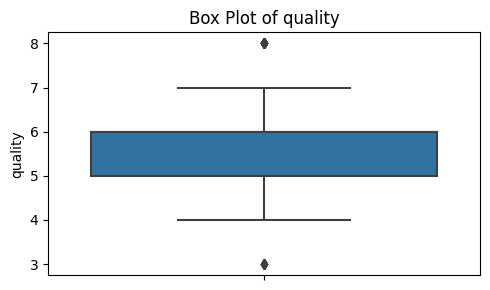

In [15]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [16]:
df.select_dtypes(include=['float64','int64']).columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
print(df[df['fixed_acidity']>14].shape)
print(df[df['volatile_acidity']>1.20].shape)
print(df[df['citric_acid']>0.8].shape)

print(df[df['residual_sugar']>9].shape)
print(df[df['chlorides']>0.3].shape)
print(df[df['free_sulfur_dioxide']>60].shape)

print(df[df['total_sulfur_dioxide']>160].shape)
print(df[ (df['pH']>3.8)|(df['pH']<2.8) ].shape)
print(df[df['sulphates']>1.5].shape)

print(df[df['alcohol']>14].shape)


(6, 12)
(3, 12)
(1, 12)
(4, 12)
(14, 12)
(2, 12)
(3, 12)
(5, 12)
(5, 12)
(1, 12)


In [18]:
condition = (
    (df['fixed_acidity'] > 14) |
    (df['volatile_acidity'] > 1.20) |
    (df['citric_acid'] > 0.8) |
    (df['residual_sugar'] > 9) |
    (df['chlorides'] > 0.3) |
    (df['free_sulfur_dioxide'] > 60) |
    (df['total_sulfur_dioxide'] > 160) |
    (df['pH'] > 3.8) | (df['pH'] < 2.8) |
    (df['sulphates'] > 1.5) |
    (df['alcohol'] > 14)
)

# Keep only the rows that do NOT meet any of the above conditions
df = df[~condition]


In [19]:
df.shape

(979, 12)

In [20]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [21]:
df.corr()['quality'].sort_values()

volatile_acidity       -0.405481
total_sulfur_dioxide   -0.225131
density                -0.194108
chlorides              -0.145645
free_sulfur_dioxide    -0.076585
pH                     -0.061769
residual_sugar          0.029344
fixed_acidity           0.120152
citric_acid             0.255706
sulphates               0.350131
alcohol                 0.511186
quality                 1.000000
Name: quality, dtype: float64

In [22]:
df=df.drop(columns=['free_sulfur_dioxide','pH','residual_sugar'],axis=1)

<Axes: >

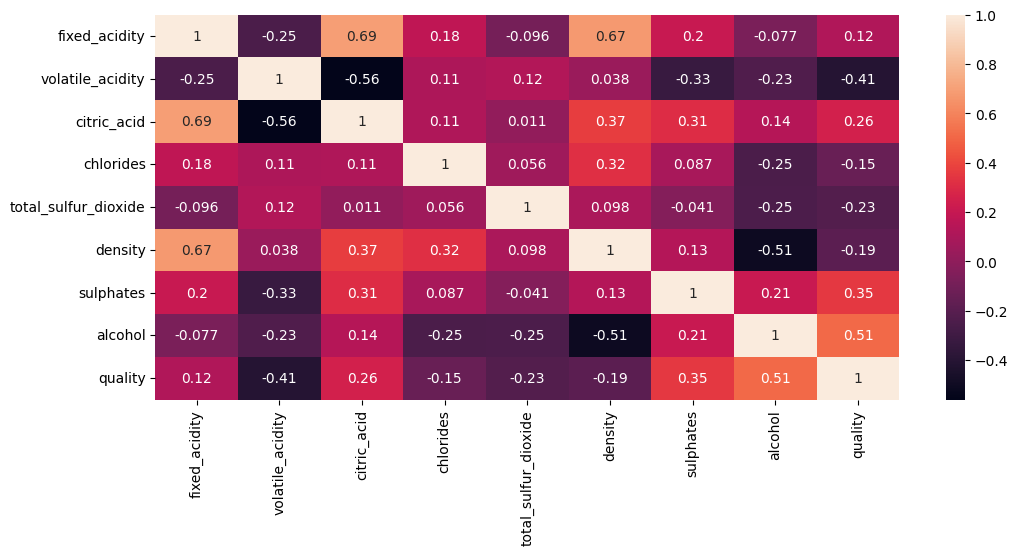

In [23]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
5,7.4,0.66,0.00,0.075,40.0,0.9978,0.56,9.4,5


<Axes: xlabel='quality'>

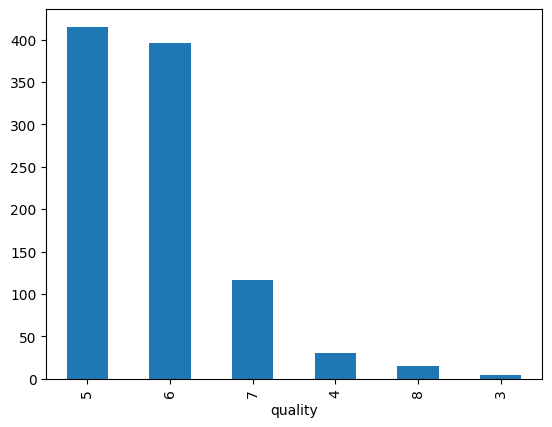

In [25]:
df['quality'].value_counts().plot(kind='bar')

In [26]:
label_map = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}

df['quality'] = df['quality'].map(label_map)

In [27]:
df['quality'].value_counts()

quality
2    415
3    396
4    117
1     31
5     15
0      5
Name: count, dtype: int64

In [28]:
x = df.drop(columns=['quality'])  # Features (all columns except 'price')
y = df['quality'].values

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
def train_model(model, model_name):
    print(f'Model: {model_name}')
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Training Accuracy Score: {train_accuracy:.2f}')
    print(f'Testing Accuracy Score: {test_accuracy:.2f}')
    
    # Generate classification report for testing data
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(report)
    
    return model

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary for the models
model_list = dict(
    knn=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2),
    svc=SVC(kernel='linear', random_state=0),
    logistic=LogisticRegression(),
    naive=GaussianNB(),
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0),
    forest=RandomForestClassifier(n_estimators=50, criterion="entropy"),
    xgboost=XGBClassifier(),
    gradientboost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
)

# Store evaluation results in a list
results = []

# Assuming X_train, y_train, X_test, y_test are already defined
for key, model in model_list.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics in the results list
    results.append({
        'Model': key,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

model_metrics_df = pd.DataFrame(results)


sorted_df = model_metrics_df.sort_values(by='Accuracy', ascending=False)

styled_df = sorted_df.style.background_gradient(cmap='viridis', subset=['Accuracy'])

styled_df

,Model,Accuracy,Precision,Recall,F1-Score
2,logistic,0.632716,0.308487,0.287625,0.291478
1,svc,0.604938,0.202076,0.236024,0.217715
3,naive,0.592593,0.346351,0.350655,0.338934
5,forest,0.592593,0.281649,0.286921,0.283735
6,xgboost,0.583333,0.278024,0.286791,0.282249
7,gradientboost,0.540123,0.261577,0.263672,0.253137
0,knn,0.521605,0.264105,0.266696,0.264808
4,tree,0.478395,0.244250,0.238510,0.240920


In [34]:
from sklearn.model_selection import cross_val_score
model=LogisticRegression()
model.fit(x_train, y_train)
# Perform 5-fold cross-validation
scores = cross_val_score(model, x_train, y_train, cv=20, scoring='accuracy')

In [35]:
scores

array([0.39393939, 0.54545455, 0.51515152, 0.51515152, 0.66666667,
       0.63636364, 0.54545455, 0.60606061, 0.63636364, 0.57575758,
       0.63636364, 0.42424242, 0.51515152, 0.63636364, 0.45454545,
       0.6875    , 0.53125   , 0.71875   , 0.625     , 0.5625    ])